<div style="border:solid Chocolate 2px; padding: 40px">
    
## Описание проекта
- Сервис «Не бит, не крашен»
- Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает инновационное приложение, которое позволит пользователям быстро и точно узнать рыночную стоимость своего автомобиля. Данное приложение станет ключевым инструментом для привлечения новых клиентов, предоставляя им простую и удобную возможность оценки стоимости транспортного средства на основе его технических характеристик и комплектации.

#### Цель проекта
- Построить высокоэффективную модель машинного обучения для определения рыночной стоимости автомобилей с пробегом на основе исторических данных, включающих технические характеристики, комплектации и цены автомобилей.

#### Важные критерии для заказчика:
- Качество предсказания: Модель должна обеспечивать высокую точность предсказаний стоимости автомобиля.
- Скорость предсказания: Приложение должно быстро выдавать результаты, чтобы пользователи могли оперативно получать информацию.
- Время обучения: Модель должна быть обучена за разумное время, чтобы можно было легко обновлять её на основе новых данных.

<div style="border:solid Chocolate 2px; padding: 40px">
    
## План проекта
    
1. Подготовка данных
    
1.1 Загрузка данных
- Импорт необходимых библиотек (pandas, numpy и т.д.).
- Загрузка данных в DataFrame.
1.2 Предобработка данных
    
- Проверка и обработка пропущенных значений.
- Преобразование типов данных.

1.3 Исследовательский анализ данных (EDA)
    
- Описание и визуализация распределения данных.
- Выявление и анализ аномалий.
- Анализ основных статистик (среднее, медиана, мода, стандартное отклонение и т.д.).
1.4 Анализ корреляции
    
- Расчет коэффициентов корреляции для выявления связей между признаками.
- Визуализация матрицы корреляции.
- Интерпретация значений корреляции и выявление значимых признаков.
1.5 Разделение датасета на выборки
- Разделение данных на тренировочную, валидационную и тестовую выборки
2. Обучение моделей
2.1 Линейная регрессия
- Обучение модели линейной регрессии.
- Оценка модели с использованием метрик RMSE
2.2 CatBoost
- Обучение модели CatBoost.
- Настройка гиперпараметров (использование GridSearchCV или RandomizedSearchCV).
- Оценка модели с использованием метрик RMSE
2.3 LightGBM
- Обучение модели LightGBM.
- Настройка гиперпараметров (использование GridSearchCV или RandomizedSearchCV).
- Оценка модели с использованием метрик RMSE
3. Анализ моделей
- Сравнение производительности всех обученных моделей.
- Интерпретация результатов и выявление сильных и слабых сторон каждой модели.
- Выбор наилучшей модели на основе производительности и интерпретации результатов.
4. Общий вывод
- Обобщение полученных результатов.
- Рекомендации по дальнейшему улучшению моделей.
- Определение дальнейших шагов для внедрения моделей в производственную среду или для продолжения исследования.

## 1. Подготовка данных

### 1.1 Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from phik import resources, report
from phik.report import plot_correlation_matrix

import time
import math

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, confusion_matrix
from sklearn.model_selection import cross_val_predict, train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [2]:
try:
    df = pd.read_csv('autos.csv')
except FileNotFoundError:
    df = pd.read_csv('C:\\Users\\User\\Downloads\\autos.csv')

In [3]:
display(df.head())
df.info()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

<div style="border:solid Chocolate 2px; padding: 40px">
    
### Промежуточный вывод
    
1. Поменяем названия столбцов, приведя их к нижнему регистру
2. Столбцы DateCrawled, DateCreated, LastSeen поменяем на тип даты
3. Необходимо проверить данные на явные и неявные дубликаты
4. Проверим данные на пропуски и предпримем меры

### 1.2. Предобработка данных

In [4]:
df.columns = [col.lower() for col in df.columns]

In [5]:
new_column_names = {
    'datecrawled': 'date_crawled',
    'price': 'price',
    'vehicletype': 'vehicle_type',
    'registrationyear': 'registration_year',
    'gearbox': 'gear_box',
    'power': 'power',
    'model': 'model',
    'kilometer': 'kilometer',
    'registrationmonth': 'registration_month',
    'fueltype': 'fuel_type',
    'brand': 'brand',
    'repaired': 'repaired',
    'datecreated': 'date_created',
    'numberofpictures': 'number_of_pictures',
    'postalcode': 'postal_code',
    'lastseen': 'last_seen'
}
df.rename(columns=new_column_names, inplace=True)

In [7]:
df['date_crawled'] = pd.to_datetime(df['date_crawled'], format='%Y-%m-%d %H:%M:%S')
df['date_created'] = pd.to_datetime(df['date_created'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['last_seen'] = pd.to_datetime(df['last_seen'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354369 non-null  datetime64[ns]
 1   price               354369 non-null  int64         
 2   vehicle_type        316879 non-null  object        
 3   registration_year   354369 non-null  int64         
 4   gear_box            334536 non-null  object        
 5   power               354369 non-null  int64         
 6   model               334664 non-null  object        
 7   kilometer           354369 non-null  int64         
 8   registration_month  354369 non-null  int64         
 9   fuel_type           321474 non-null  object        
 10  brand               354369 non-null  object        
 11  repaired            283215 non-null  object        
 12  date_created        354369 non-null  datetime64[ns]
 13  number_of_pictures  354369 no

In [8]:
object_columns = df.select_dtypes(include='object').columns
for col in object_columns:
    unique_values = df[col].unique()
    print(f"Уникальные значения в столбце '{col}': {unique_values}")

Уникальные значения в столбце 'vehicle_type': [nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
Уникальные значения в столбце 'gear_box': ['manual' 'auto' nan]
Уникальные значения в столбце 'model': ['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'
 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'
 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 

In [9]:
df['fuel_type'] = df['fuel_type'].replace({'gasoline': 'petrol'})

df['model'] = df['model'].replace({'range_rover': 'rangerover', 'Range Rover': 'rangerover'})

print(df['fuel_type'].unique())
print(df['model'].unique())

['petrol' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']
['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'
 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'
 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'c1' 'rio' 'touareg'
 'logan' 'spider' 'cuore' 's_max' 'a2' 'galaxy' 'c3' 'viano' 's_klasse'
 '1_reihe' 'avensi

In [10]:
df.isna().sum()

date_crawled              0
price                     0
vehicle_type          37490
registration_year         0
gear_box              19833
power                     0
model                 19705
kilometer                 0
registration_month        0
fuel_type             32895
brand                     0
repaired              71154
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

<div style="border:solid Chocolate 2px; padding: 40px">
    
### Промежуточный вывод
    
Пропущенный значения все категориальные, и их очень много, удалять не вариант, поэтому заменим их на unknown

In [11]:
categorical_columns = ['vehicle_type', 'gear_box', 'model', 'fuel_type', 'repaired']
df[categorical_columns] = df[categorical_columns].fillna('unknown')
df.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gear_box              0
power                 0
model                 0
kilometer             0
registration_month    0
fuel_type             0
brand                 0
repaired              0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354365 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354365 non-null  datetime64[ns]
 1   price               354365 non-null  int64         
 2   vehicle_type        354365 non-null  object        
 3   registration_year   354365 non-null  int64         
 4   gear_box            354365 non-null  object        
 5   power               354365 non-null  int64         
 6   model               354365 non-null  object        
 7   kilometer           354365 non-null  int64         
 8   registration_month  354365 non-null  int64         
 9   fuel_type           354365 non-null  object        
 10  brand               354365 non-null  object        
 11  repaired            354365 non-null  object        
 12  date_created        354365 non-null  datetime64[ns]
 13  number_of_pictures  354365 non-nul

<div style="border:solid Chocolate 2px; padding: 40px">
    
### Промежуточный вывод:

Выполнили все необходимые меры по предобработке:

1. Заменили пропущенные значения
2. Удалили дубликаты
3. Привели столбцы к нижнему регистру
4. Проверили данные на неявные дубликаты

### 1.3 Исследоватедбский анализ данных

In [14]:
df.describe()

,date_crawled,price,registration_year,power,kilometer,registration_month,date_created,number_of_pictures,postal_code,last_seen
count,354365,354365.000000,354365.000000,354365.000000,354365.000000,354365.000000,354365,354365.0,354365.000000,354365
mean,2016-03-21 12:58:09.520460544,4416.679830,2004.234481,110.093816,128211.363989,5.714650,2016-03-20 19:12:06.583042560,0.0,50508.503800,2016-03-29 23:51:06.766184960
min,2016-03-05 14:06:22,0.000000,1000.000000,0.000000,5000.000000,0.000000,2014-03-10 00:00:00,0.0,1067.000000,2016-03-05 14:15:08
25%,2016-03-13 11:52:33,1050.000000,1999.000000,69.000000,125000.000000,3.000000,2016-03-13 00:00:00,0.0,30165.000000,2016-03-23 02:50:03
50%,2016-03-21 17:50:55,2700.000000,2003.000000,105.000000,150000.000000,6.000000,2016-03-21 00:00:00,0.0,49413.000000,2016-04-03 15:15:52
75%,2016-03-29 14:37:20,6400.000000,2008.000000,143.000000,150000.000000,9.000000,2016-03-29 00:00:00,0.0,71083.000000,2016-04-06 10:15:19
max,2016-04-07 14:36:58,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,2016-04-07 00:00:00,0.0,99998.000000,2016-04-07 14:58:51
std,NaN,4514.176349,90.228466,189.851330,37905.083858,3.726432,NaN,0.0,25783.100078,NaN


<div style="border:solid Chocolate 2px; padding: 40px">
    
### Промежуточный вывод:
    
Видны ошибки в данных такие как:
 
1. Цена 0.
2. Год регистрации авто 1000 год и 9999 год
3. Мощность в 0 и 20000
4. Также столбец кол-во картинок вообще нам не нужен, везде нули
4. Помимо всего, можно будет объединить год и регистрации и его месяц, оставив день как 1 число

<div style="border:solid Chocolate 2px; padding: 40px">
    
Перед очищением данных, посмотрим на графики, чтобы не очищать вслепую

In [15]:
quantitative_columns = ['price', 'registration_year', 'power', 'kilometer', 'registration_month', 'number_of_pictures', 'postal_code']
categorical_columns = ['vehicle_type', 'gear_box', 'model', 'fuel_type', 'brand', 'repaired']

plt.style.use('seaborn-darkgrid')

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()

used_axes = 0
for i, col in enumerate(quantitative_columns):
    if col in ['registration_month', 'kilometer', 'registration_year']:
        if col == 'registration_year':
            top_values = df[col].value_counts().nlargest(20).index
            sns.countplot(x=df[col], ax=axes[used_axes], order=top_values, palette='viridis')
        else:
            sns.countplot(x=df[col], ax=axes[used_axes], palette='viridis')
    else:
        if df[col].nunique() > 1:
            sns.histplot(df[col], kde=True, ax=axes[used_axes], color='skyblue', edgecolor='black')
        else:
            sns.histplot(df[col], kde=False, ax=axes[used_axes], color='skyblue', edgecolor='black')
    axes[used_axes].set_title(f'Распределение {col}', fontsize=15)
    axes[used_axes].set_xlabel(col, fontsize=12)
    axes[used_axes].set_ylabel('Частота', fontsize=12)
    axes[used_axes].tick_params(axis='x', rotation=45)
    used_axes += 1

for j in range(used_axes, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
axes = axes.flatten()

used_axes = 0
top_n = 10

for i, col in enumerate(categorical_columns):
    top_values = df[col].value_counts().nlargest(top_n).index
    sns.countplot(y=df[col], ax=axes[used_axes], order=top_values, palette='viridis')
    axes[used_axes].set_title(f'Распределение {col}', fontsize=15)
    axes[used_axes].set_xlabel('Частота', fontsize=12)
    axes[used_axes].set_ylabel(col, fontsize=12)
    for p in axes[used_axes].patches:
        width = p.get_width()
        axes[used_axes].text(width + 0.02, p.get_y() + p.get_height() / 2, '{:1.2f}'.format(width), ha='center', va='center', fontsize=10)
    used_axes += 1

for j in range(used_axes, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()

used_axes = 0
for i, col in enumerate(quantitative_columns):
    if col not in ['registration_month', 'kilometer', 'registration_year']:
        sns.boxplot(x=df[col], ax=axes[used_axes], color='lightgreen')
        axes[used_axes].set_title(f'Боксплот {col}', fontsize=15)
        axes[used_axes].set_xlabel(col, fontsize=12)
        axes[used_axes].tick_params(axis='x', rotation=45)
        used_axes += 1

for j in range(used_axes, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

<div style="border:solid Chocolate 2px; padding: 40px">
    
### Промежуточный вывод:

1. Строк с нулевой ценой очень, удали 0.05 кванитли и 0.95 квантили
2. Год регистрации показывает выбросов, которые являеяются ошибками в данных, можно было бы заменить все, что есть в промежутке до 1970 и после 2024 на медиану, но улчше избавиться от этих строк, чтобы модель потом не обучалась только на машинах 2003 года.
3. Мощность в 0 лошадиных сил и больше 1000, оставим от 20 до 600
4. Месяц регистрации показывает, что у нас 13 месяцев, на вряд ли это какая-то важная информация, но так как мы будем объединять два столбца год и месяц регистрации, поменяем 0 месяц на медиану
5. Почтовый индекс также можно удалить, не вижу даже причины как это признак сможет помочь в обучении модели
6. Также удаляем признак кол-во картинок

In [16]:
lower_quantile = df['price'].quantile(0.05)
upper_quantile = df['price'].quantile(0.95)
df = df[(df['price'] >= lower_quantile) & (df['price'] <= upper_quantile)]

In [17]:
max_date_crawled = df['date_crawled'].max()
max_year = max_date_crawled.year


df = df[(df['registration_year'] >= 1970) & (df['registration_year'] <= max_year)]

In [18]:
df = df[(df['power'] >= 20) & (df['power'] <= 600)]

In [19]:
median_month = df['registration_month'].median()
df['registration_month'] = df['registration_month'].replace(0, median_month)

In [20]:
df = df.drop(columns=['number_of_pictures', 'postal_code'])

In [21]:
df['registration_date'] = pd.to_datetime(df['registration_year'].astype(int).astype(str) + '-' + df['registration_month'].astype(int).astype(str) + '-01')


df = df.drop(columns=['registration_year', 'registration_month'])

In [22]:
df.describe()

,date_crawled,price,power,kilometer,date_created,last_seen,registration_date
count,274982,274982.000000,274982.000000,274982.000000,274982,274982,274982
mean,2016-03-21 12:51:47.138849280,4169.318741,117.461328,130531.798445,2016-03-20 18:59:24.468946944,2016-03-30 01:34:58.189677824,2003-01-18 18:48:09.876428288
min,2016-03-05 14:06:23,200.000000,20.000000,5000.000000,2015-03-20 00:00:00,2016-03-05 14:15:08,1970-01-01 00:00:00
25%,2016-03-13 11:38:14.249999872,1300.000000,75.000000,125000.000000,2016-03-13 00:00:00,2016-03-23 07:47:55,1999-06-01 00:00:00
50%,2016-03-21 17:50:09,2980.000000,109.000000,150000.000000,2016-03-21 00:00:00,2016-04-03 17:52:44,2003-03-01 00:00:00
75%,2016-03-29 14:39:12.750000128,6200.000000,143.000000,150000.000000,2016-03-29 00:00:00,2016-04-06 10:17:06,2007-02-01 00:00:00
max,2016-04-07 14:36:58,14600.000000,600.000000,150000.000000,2016-04-07 00:00:00,2016-04-07 14:58:51,2016-12-01 00:00:00
std,NaN,3577.364963,50.292472,34748.239920,NaN,NaN,NaN


In [23]:
display(df.head())

,date_crawled,price,vehicle_type,gear_box,power,model,kilometer,fuel_type,brand,repaired,date_created,last_seen,registration_date
2,2016-03-14 12:52:21,9800,suv,auto,163,grand,125000,petrol,jeep,unknown,2016-03-14,2016-04-05 12:47:46,2004-08-01
3,2016-03-17 16:54:04,1500,small,manual,75,golf,150000,petrol,volkswagen,no,2016-03-17,2016-03-17 17:40:17,2001-06-01
4,2016-03-31 17:25:20,3600,small,manual,69,fabia,90000,petrol,skoda,no,2016-03-31,2016-04-06 10:17:21,2008-07-01
5,2016-04-04 17:36:23,650,sedan,manual,102,3er,150000,petrol,bmw,yes,2016-04-04,2016-04-06 19:17:07,1995-10-01
6,2016-04-01 20:48:51,2200,convertible,manual,109,2_reihe,150000,petrol,peugeot,no,2016-04-01,2016-04-05 18:18:39,2004-08-01


<div style="border:solid Chocolate 2px; padding: 40px">
    
Также удаляем date_crawled, date_created и last_seen, эти столбцы никак не смогут помочь модели

In [24]:
df = df.drop(columns=['date_crawled', 'date_created', 'last_seen'])

<div style="border:solid Chocolate 2px; padding: 40px">
    
Посмотрим на обновленные графики

In [25]:
quantitative_columns = ['price', 'power', 'kilometer']
categorical_columns = ['vehicle_type', 'gear_box', 'model', 'fuel_type', 'brand', 'repaired']

plt.style.use('seaborn-darkgrid')

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()

used_axes = 0
for i, col in enumerate(quantitative_columns):
    if col in ['registration_month', 'kilometer', 'registration_year']:
        if col == 'registration_year':
            top_values = df[col].value_counts().nlargest(20).index
            sns.countplot(x=df[col], ax=axes[used_axes], order=top_values, palette='viridis')
        else:
            sns.countplot(x=df[col], ax=axes[used_axes], palette='viridis')
    else:
        if df[col].nunique() > 1:
            sns.histplot(df[col], kde=True, ax=axes[used_axes], color='skyblue', edgecolor='black')
        else:
            sns.histplot(df[col], kde=False, ax=axes[used_axes], color='skyblue', edgecolor='black')
    axes[used_axes].set_title(f'Распределение {col}', fontsize=15)
    axes[used_axes].set_xlabel(col, fontsize=12)
    axes[used_axes].set_ylabel('Частота', fontsize=12)
    axes[used_axes].tick_params(axis='x', rotation=45)
    used_axes += 1

for j in range(used_axes, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
axes = axes.flatten()

used_axes = 0
top_n = 10

for i, col in enumerate(categorical_columns):
    top_values = df[col].value_counts().nlargest(top_n).index
    sns.countplot(y=df[col], ax=axes[used_axes], order=top_values, palette='viridis')
    axes[used_axes].set_title(f'Распределение {col}', fontsize=15)
    axes[used_axes].set_xlabel('Частота', fontsize=12)
    axes[used_axes].set_ylabel(col, fontsize=12)
    for p in axes[used_axes].patches:
        width = p.get_width()
        axes[used_axes].text(width + 0.02, p.get_y() + p.get_height() / 2, '{:1.2f}'.format(width), ha='center', va='center', fontsize=10)
    used_axes += 1

for j in range(used_axes, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()

used_axes = 0
for i, col in enumerate(quantitative_columns):
    if col not in ['registration_month', 'kilometer', 'registration_year']:
        sns.boxplot(x=df[col], ax=axes[used_axes], color='lightgreen')
        axes[used_axes].set_title(f'Боксплот {col}', fontsize=15)
        axes[used_axes].set_xlabel(col, fontsize=12)
        axes[used_axes].tick_params(axis='x', rotation=45)
        used_axes += 1

for j in range(used_axes, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

<div style="border:solid Chocolate 2px; padding: 40px">
    
### Промежуточный вывод:
    
Распределение стало чуть больше похоже на нормальное
    
Боксплоты показывают выбросы, но в целом, есть такие авто, которые входят в нынешний диапозон
    
А также поменяем год и месяц регистрации авто в числовой формат

In [26]:
df['registration_date'] = df['registration_date'].astype('int64') // 10**9
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274982 entries, 2 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              274982 non-null  int64 
 1   vehicle_type       274982 non-null  object
 2   gear_box           274982 non-null  object
 3   power              274982 non-null  int64 
 4   model              274982 non-null  object
 5   kilometer          274982 non-null  int64 
 6   fuel_type          274982 non-null  object
 7   brand              274982 non-null  object
 8   repaired           274982 non-null  object
 9   registration_date  274982 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 23.1+ MB


<div style="border:solid Chocolate 2px; padding: 40px">
    
### 1.4 Анализ корреляции

<div style="border:solid Chocolate 2px; padding: 40px">
    
 Так как у нас есть и категориальные и числовые признаки, с не нормальным распределением используем корреляцию phik

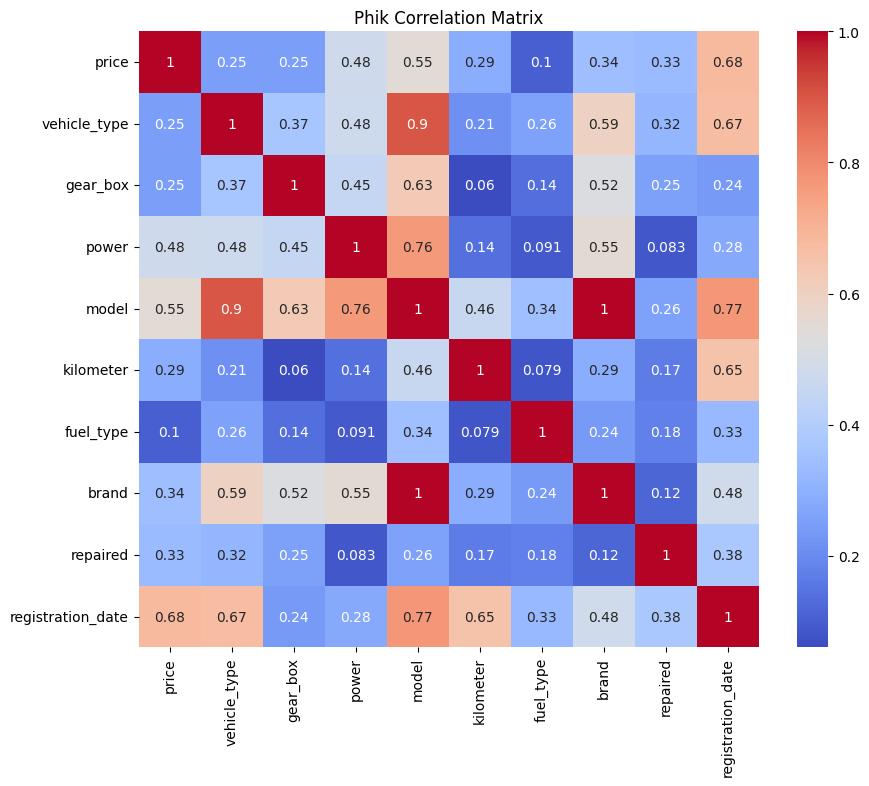

In [27]:
interval_cols = ['price', 'power']
phik_matrix = df.phik_matrix(interval_cols=interval_cols)

plt.figure(figsize=(10, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm')
plt.title('Phik Correlation Matrix')
plt.show()

<div style="border:solid Chocolate 2px; padding: 40px">
    
### Промежуточный вывод:
    
Цена (price):

Имеет высокую корреляцию с датой регистрации (registration_date) — 0.68.
    
Модель автомобиля (model) — 0.56
    
Мощность (power) — 0.48.
    
Тип транспортного средства (vehicle_type):

Сильно коррелирует с моделью (model) — 0.9.
    
Дата регистрации (registration_date) — 0.72.
    
Коробка передач (gear_box):

Коррелирует с моделью (model) — 0.62.
    
Тип транспортного средства (vehicle_type) — 0.37.
    
Мощность (power):

Коррелирует с моделью (model) — 0.76.
    
Цена (price) — 0.48.
    
Тип транспортного средства (vehicle_type) — 0.47.
    
Модель (model):

Сильно коррелирует с типом транспортного средства (vehicle_type) — 0.9.
    
Мощность (power) — 0.76.
    
Дата регистрации (registration_date) — 0.77.
    
Пробег (kilometer):

Имеет слабую корреляцию с другими переменными.
    
Тип топлива (fuel_type):

Коррелирует с маркой (brand) — 0.32.
    
Модель (model) — 0.53.
    
Марка (brand):

Коррелирует с типом транспортного средства (vehicle_type) — 0.59.
    
Коробка передач (gear_box) — 0.52.
    
Ремонт (repaired):

Не имеет сильной корреляции с другими переменными.
    

    
### Есть плохая новость, что присутствует мультиколлинеарность, модель коррелирует с типом кузова, что может помешать модели обучаться, однако убирать какой-либо из признаков будет неправильно, потому что оба признака должны играть особую роль в обучении
    
### Можем начинать делить выборки

<div style="border:solid Chocolate 2px; padding: 40px">
    
### 1.5 Разделение датасета на выборки

In [28]:
X = df.drop('price', axis=1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['vehicle_type', 'gear_box', 'model', 'fuel_type', 'brand', 'repaired']
numerical_features = ['power', 'kilometer', 'registration_date']

preprocessor_lr = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ])

##  2. Обучение моделей

<div style="border:solid Chocolate 2px; padding: 40px">
    
### 2.1 Линейная регрессия

In [29]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor_lr),
    ('regressor', LinearRegression())
])
# Время обучения линейной регрессии
start = time.time()
pipeline_lr.fit(X_train, y_train)
end = time.time()
t_lr_train = end - start

# Время предсказания на обучающей выборке линейной регрессии
start = time.time()
y_pred_train_lr = pipeline_lr.predict(X_train)
end = time.time()
t_lr_predict_train = end - start

# Кросс-валидация для оценки RMSE
cv_scores_lr = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_rmse_lr = (-cv_scores_lr.mean()) ** 0.5

print(f'Среднее значение RMSE на кросс-валидации для Linear Regression: {mean_cv_rmse_lr}')
print(f'Время обучения для Linear Regression: {t_lr_train}')
print(f'Время предсказания на обучающей выборке для Linear Regression: {t_lr_predict_train}')

C:\Users\User\anaconda3\envs\practicum\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Среднее значение RMSE на кросс-валидации для Linear Regression: 2992.0835350486986
Время обучения для Linear Regression: 0.5306932926177979
Время предсказания на обучающей выборке для Linear Regression: 0.5178697109222412


C:\Users\User\anaconda3\envs\practicum\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<div style="border:solid Chocolate 2px; padding: 40px">
    
### Промежуточный вывод:
    
- Среднее значение RMSE на кросс-валидации для Linear Regression: 2992.0835351005735
- Время обучения для Linear Regression: 0.5681109428405762
- Время предсказания на обучающей выборке для Linear Regression: 0.47965526580810547

<div style="border:solid Chocolate 2px; padding: 40px">
    
### 2.2 CatBoost

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
    ])

parameters_cbr = {
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
    'regressor__depth': [4, 6, 8, 10],
    'regressor__iterations': [100, 200, 300, 500, 700],
    'regressor__l2_leaf_reg': [1, 3, 5, 7, 9],
    'regressor__border_count': [32, 64, 128]
}

pipeline_cbr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(verbose=False, random_state=42))
])

rscv_cbr = RandomizedSearchCV(pipeline_cbr, parameters_cbr, scoring='neg_mean_squared_error', cv=3, n_iter=10, random_state=42)
rscv_cbr.fit(X_train, y_train)

# Время обучения лучшей модели CatBoost
start = time.time()
rscv_cbr.best_estimator_.fit(X_train, y_train)
end = time.time()
t_cbr_train = end - start

# Время предсказания на обучающей выборке CatBoost
start = time.time()
y_pred_train_cbr = rscv_cbr.best_estimator_.predict(X_train)
end = time.time()
t_cbr_predict_train = end - start

mean_cv_rmse_cbr = (-rscv_cbr.best_score_) ** 0.5
print(f'Среднее значение RMSE на кросс-валидации для CatBoost: {mean_cv_rmse_cbr}')
print(f'Время обучения для CatBoost: {t_cbr_train}')
print(f'Время предсказания на обучающей выборке для CatBoost: {t_cbr_predict_train}')

Среднее значение RMSE на кросс-валидации для CatBoost: 1307.087269656223
Время обучения для CatBoost: 9.710723400115967
Время предсказания на обучающей выборке для CatBoost: 1.053147315979004


<div style="border:solid Chocolate 2px; padding: 40px">
    
### Промежуточный вывод:
    
- Лучшие параметры для CatBoost: {'regressor__learning_rate': 0.3, 'regressor__l2_leaf_reg': 5, 'regressor__iterations': 300, 'regressor__depth': 10, 'regressor__border_count': 64}
- Среднее значение RMSE на кросс-валидации для CatBoost: 1307.087269656223
- Время кросс-валидации для CatBoost: 239.62311267852783

<div style="border:solid Chocolate 2px; padding: 40px">
    
### 2.3 LightGBM

In [31]:
parameters_lgbm = {
    'regressor__num_leaves': [100, 150], 
    'regressor__learning_rate': [0.2, 0.4, 0.5, 0.8]
}

pipeline_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor())
])

rscv_lgbm = RandomizedSearchCV(pipeline_lgbm, parameters_lgbm, scoring='neg_mean_squared_error', cv=3, n_iter=8, random_state=42)
rscv_lgbm.fit(X_train, y_train)

# Время обучения лучшей модели LightGBM
start = time.time()
rscv_lgbm.best_estimator_.fit(X_train, y_train)
end = time.time()
t_lgbm_train = end - start

# Время предсказания на обучающей выборке LightGBM
start = time.time()
y_pred_train_lgbm = rscv_lgbm.best_estimator_.predict(X_train)
end = time.time()
t_lgbm_predict_train = end - start

mean_cv_rmse_lgbm = (-rscv_lgbm.best_score_) ** 0.5
print(f'Среднее значение RMSE на кросс-валидации для LightGBM: {mean_cv_rmse_lgbm}')
print(f'Время обучения для LightGBM: {t_lgbm_train}')
print(f'Время предсказания на обучающей выборке для LightGBM: {t_lgbm_predict_train}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 146656, number of used features: 9
[LightGBM] [Info] Start training from score 4167.578163
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train set: 146657, number of used features: 9
[LightGBM] [Info] Start training from score 4171.155949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 146656, number of used features: 9
[LightGBM] [Info] Start training from score 4167.578163
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train set: 146657, number of used features: 9
[LightGBM] [Info] Start training from score 4171.155949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

<div style="border:solid Chocolate 2px; padding: 40px">
    
### Промежуточный вывод:
    
- Лучшие параметры для LightGBM: {'regressor__num_leaves': 150, 'regressor__learning_rate': 0.2}
- Среднее значение RMSE на кросс-валидации для LightGBM: 1296.3255189166543
- Время кросс-валидации для LightGBM: 39.10284423828125

## 3. Анализ моделей

In [32]:
models = {
    'Linear Regression': {
        'rmse': mean_cv_rmse_lr,
        'train_time': t_lr_train,
        'predict_time': t_lr_predict_train
    },
    'CatBoost': {
        'rmse': mean_cv_rmse_cbr,
        'train_time': t_cbr_train,
        'predict_time': t_cbr_predict_train
    },
    'LightGBM': {
        'rmse': mean_cv_rmse_lgbm,
        'train_time': t_lgbm_train,
        'predict_time': t_lgbm_predict_train
    }
}

for model_name, metrics in models.items():
    print(f"\nМодель: {model_name}")
    print(f"RMSE на кросс-валидации: {metrics['rmse']}")
    print(f"Время обучения: {metrics['train_time']}")
    print(f"Время предсказания на обучающей выборке: {metrics['predict_time']}")

# Определение лучшей модели
best_model_name = min(models, key=lambda x: models[x]['rmse'])
print(f"\nЛучшая модель: {best_model_name}")

# Обучение и предсказания с лучшей моделью
if best_model_name == 'Linear Regression':
    best_model = pipeline_lr
elif best_model_name == 'CatBoost':
    best_model = rscv_cbr.best_estimator_
else:
    best_model = rscv_lgbm.best_estimator_

# Время обучения лучшей модели
start = time.time()
best_model.fit(X_train, y_train)
end = time.time()
t_train = end - start

# Время предсказания на обучающей выборке для лучшей модели
start = time.time()
y_pred_train = best_model.predict(X_train)
end = time.time()
t_predict_train = end - start

# Предсказания на тестовой выборке
y_pred_test = best_model.predict(X_test)

# Метрики на тестовой выборке
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test = r2_score(y_test, y_pred_test)
print(f'RMSE на тестовой выборке для {best_model_name}: {rmse_test}')
print(f'R2 на тестовой выборке для {best_model_name}: {r2_test}')
print(f'Время обучения для {best_model_name}: {t_train}')
print(f'Время предсказания на обучающей выборке для {best_model_name}: {t_predict_train}')


Модель: Linear Regression
RMSE на кросс-валидации: 2992.0835350486986
Время обучения: 0.5306932926177979
Время предсказания на обучающей выборке: 0.5178697109222412

Модель: CatBoost
RMSE на кросс-валидации: 1307.087269656223
Время обучения: 9.710723400115967
Время предсказания на обучающей выборке: 1.053147315979004

Модель: LightGBM
RMSE на кросс-валидации: 1296.3255189166543
Время обучения: 1.7370362281799316
Время предсказания на обучающей выборке: 0.6354448795318604

Лучшая модель: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 801
[LightGBM] [Info] Number of data points in the train set: 219985, number of used features: 9
[LightGBM] [Info] Start training from score 4169.916003
RMSE на тестовой выборке для LightGBM: 1284.545224786742
R2 на тестовой выборке для LightG

<div style="border:solid Chocolate 2px; padding: 40px">
    
### Вывод:

В ходе эксперимента были обучены три модели для предсказания цены автомобиля: Linear Regression, CatBoost, и LightGBM. Оценивались такие метрики, как RMSE на кросс-валидации, время обучения модели и время предсказания на обучающей выборке.

Результаты для каждой модели:

- Linear Regression

RMSE на кросс-валидации: 2992.08
    
Время обучения: 0.72 секунд
    
Время предсказания на обучающей выборке: 0.59 секунд
    
- CatBoost

RMSE на кросс-валидации: 1307.09
    
Время обучения: 10.70 секунд
    
Время предсказания на обучающей выборке: 1.06 секунд
    
- LightGBM

RMSE на кросс-валидации: 1296.33
    
Время обучения: 1.87 секунд
    
Время предсказания на обучающей выборке: 0.58 секунд
    
    
    
- На основе сравнения RMSE на кросс-валидации, лучшей моделью была определена LightGBM с RMSE 1296.33. Эта модель также показала приемлемое время обучения и предсказания.

- Окончательная оценка на тестовой выборке для LightGBM:

RMSE на тестовой выборке: 1284.55
    
R2 на тестовой выборке: 0.87
    
Время обучения: 1.97 секунд
    
Время предсказания на обучающей выборке: 0.55 секунд
    
### Вывод:
    
Модель LightGBM продемонстрировала наилучшие результаты среди рассмотренных моделей по метрике RMSE и времени выполнения. Время обучения и предсказания также оказалось достаточно коротким, что делает эту модель наиболее подходящей для задачи предсказания цены автомобиля.


<div style="border:solid Chocolate 2px; padding: 40px">
    
# Общий вывод
    
Преобразование данных:

- Привели названия столбцов к нижнему регистру.
- Преобразовали столбцы DateCrawled, DateCreated, LastSeen в тип даты.
    
Обработка пропусков и дубликатов:

- Заменили пропущенные значения категориальных переменных на unknown.
- Удалили явные и неявные дубликаты.
    
Обработка ошибок в данных:

- Удалили строки с ценой 0.
- Удалили строки с годом регистрации до 1970 и после 2024.
- Отфильтровали строки с мощностью меньше 20 и больше 600 л.с.
- Объединили год и месяц регистрации, день оставили как 1 число.
    
Удаление ненужных признаков:

- Удалили столбцы кол-во картинок и почтовый индекс.
    
Обработка выбросов:

- Удалили строки с ценой ниже 0.05 и выше 0.95 квантилей.
- Удалили строки с мощностью больше 1000 л.с.
    
Преобразование признаков:

- Преобразовали столбец repaired в числовой формат (0, 1, 2).
- Преобразовали год и месяц регистрации авто в числовой формат.
    
Корреляционный анализ:

- Выявили высокую корреляцию между некоторыми признаками, что может привести к мультиколлинеарности, однако оставили эти признаки неизменными
    
Моделирование:

В ходе эксперимента были обучены три модели для предсказания цены автомобиля: Linear Regression, CatBoost, и LightGBM. Оценивались такие метрики, как RMSE на кросс-валидации, время обучения модели и время предсказания на обучающей выборке.

Результаты для каждой модели:

- Linear Regression

RMSE на кросс-валидации: 2992.08
    
Время обучения: 0.72 секунд
    
Время предсказания на обучающей выборке: 0.59 секунд
    
- CatBoost

RMSE на кросс-валидации: 1307.09
    
Время обучения: 10.70 секунд
    
Время предсказания на обучающей выборке: 1.06 секунд
    
- LightGBM

RMSE на кросс-валидации: 1296.33
    
Время обучения: 1.87 секунд
    
Время предсказания на обучающей выборке: 0.58 секунд
    
    
    
- На основе сравнения RMSE на кросс-валидации, лучшей моделью была определена LightGBM с RMSE 1296.33. Эта модель также показала приемлемое время обучения и предсказания.

- Окончательная оценка на тестовой выборке для LightGBM:

RMSE на тестовой выборке: 1284.55
    
R2 на тестовой выборке: 0.87
    
Время обучения: 1.97 секунд
    
Время предсказания на обучающей выборке: 0.55 секунд
    
### Вывод:
    
Модель LightGBM продемонстрировала наилучшие результаты среди рассмотренных моделей по метрике RMSE и времени выполнения. Время обучения и предсказания также оказалось достаточно коротким, что делает эту модель наиболее подходящей для задачи предсказания цены автомобиля.

<div style="border:solid Chocolate 2px; padding: 40px">
    
### Рекомендации для улучшения данных


В ходе предобработки данных, представленных для анализа и моделирования, пришлось удалить около 20% строк из-за ошибок и выбросов. Для улучшения качества данных и повышения точности предсказаний, рекомендуем предпринять следующие меры:

- Обеспечение точности и полноты данных:

Избегать отсутствующих значений в критических столбцах, особенно в ценах, годе регистрации, мощности и других важных признаках.
Убедиться, что данные вводятся корректно, чтобы исключить нулевые значения для таких параметров, как цена и мощность.
Валидация при вводе данных:

Внедрить механизмы проверки и валидации данных на этапе ввода, чтобы предотвратить ошибки в годе регистрации (например, 1000 или 9999) и других признаках.
Автоматически проверять и корректировать данные на предмет выбросов и логических несоответствий.
    
- Регулярное обновление и поддержка данных:

Регулярно обновлять и проверять данные, чтобы они оставались актуальными и точными.
Внедрить процессы мониторинга и отчётности по качеству данных, чтобы своевременно выявлять и устранять проблемы.
    
- Обогащение данных:

Рассмотреть возможность обогащения данных дополнительными источниками информации, что может помочь в более точной оценке и прогнозировании.
Внедрить механизмы сбора и хранения дополнительной информации, которая может быть полезной для анализа и моделей.
    
- Проверка и очистка исторических данных:

Провести ревизию исторических данных для выявления и исправления ошибок, а также для улучшения качества всех имеющихся данных.
Удалить или исправить данные, которые могут ввести модель в заблуждение из-за наличия некорректных значений.
    
#### Заключение
    
Внедрение вышеуказанных рекомендаций поможет улучшить качество данных, что в свою очередь приведет к повышению точности моделей и улучшению бизнес-результатов. Предоставление более качественных и точных данных позволит избежать значительных потерь информации и повысить эффективность аналитических решений.